Confidence Intervals (Khoảng tin cậy)


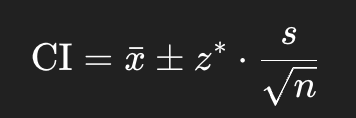

- Sample: 50 students's test results
- Calculate a 95% confidence interval for the average

In [1]:
import numpy as np
from scipy import stats

np.random.seed(0)
data = np.random.normal(loc=70, scale=10, size=50)  # trung bình 70, độ lệch chuẩn 10

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # ddof=1 để lấy mẫu, không phải tổng thể
n = len(data)

confidence = 0.95
alpha = 1 - confidence
z_critical = stats.norm.ppf(1 - alpha/2)  # ≈ 1.96 với 95%

margin_of_error = z_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Trung bình mẫu: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Trung bình mẫu: 71.41
95% Confidence Interval: (68.25, 74.56)


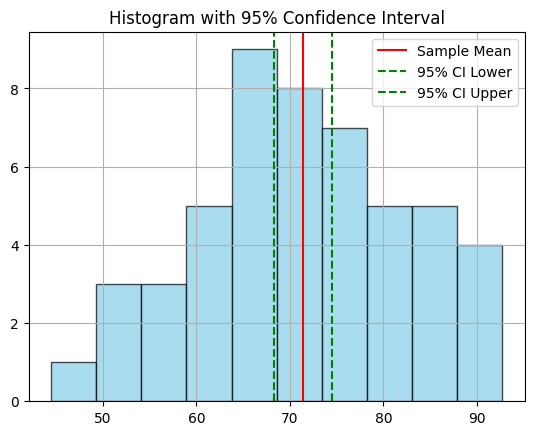

In [2]:
import matplotlib.pyplot as plt

plt.hist(data, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(sample_mean, color='red', label='Sample Mean')
plt.axvline(ci_lower, color='green', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='green', linestyle='--', label='95% CI Upper')
plt.title('Histogram with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

Student’s t-distribution

In [3]:
scores = [72, 75, 78, 69, 80, 85, 68, 74, 77, 73]
n = len(scores)

sample_mean = np.mean(scores)
sample_std = np.std(scores, ddof=1)  # ddof=1 để lấy mẫu, không phải tổng thể

confidence = 0.95
alpha = 1 - confidence
df = n - 1
t_critical = stats.t.ppf(1 - alpha/2, df)

standard_error = sample_std / np.sqrt(n)
margin_of_error = t_critical * standard_error
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Trung bình mẫu: {sample_mean:.2f}")
print(f"Độ lệch chuẩn mẫu: {sample_std:.2f}")
print(f"Hệ số t (df={df}): {t_critical:.3f}")
print(f"Sai số chuẩn: {standard_error:.3f}")
print(f"Khoảng tin cậy 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Trung bình mẫu: 75.10
Độ lệch chuẩn mẫu: 5.13
Hệ số t (df=9): 2.262
Sai số chuẩn: 1.622
Khoảng tin cậy 95%: (71.43, 78.77)


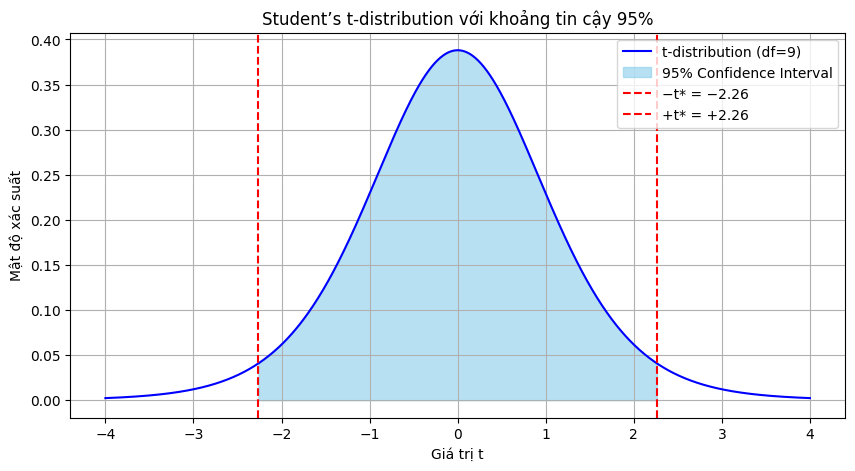

In [4]:
from scipy.stats import t

# Tạo dữ liệu trục x: từ -4 đến 4
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Giá trị t* (ngưỡng cắt cho 95% CI)
t_critical = t.ppf(1 - alpha/2, df)

# Vẽ phân phối t
plt.figure(figsize=(10, 5))
plt.plot(x, y, label=f"t-distribution (df={df})", color='blue')

# Tô vùng khoảng tin cậy
x_fill = np.linspace(-t_critical, t_critical, 1000)
y_fill = t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.6, label=f"95% Confidence Interval")

# Vẽ đường giới hạn
plt.axvline(-t_critical, color='red', linestyle='--', label=f"−t* = −{t_critical:.2f}")
plt.axvline(t_critical, color='red', linestyle='--', label=f"+t* = +{t_critical:.2f}")

# Trang trí
plt.title("Student’s t-distribution với khoảng tin cậy 95%")
plt.xlabel("Giá trị t")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.grid(True)
plt.show()
